<a href="https://colab.research.google.com/github/angelaaaateng/AIR_AI_Engineering_Course_2024/blob/main/0_NLP_TextPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Data Cleaning in NLP

## Libraries to use:
- re
- string
- nltk
- spacy

## Lowercase and Remove Special Characters

In [26]:
import re

text = "Hello, World! Welcome to our AIR LLM ENGINEERING COURSE."
print("Original text:", text)
cleaned_text = text.lower()  # Lowercasing
cleaned_text = re.sub(r'[^a-z\s]', '', cleaned_text)  # Remove special characters
print("Cleaned Text:", cleaned_text)


Original text: Hello, World! Welcome to our AIR LLM ENGINEERING COURSE.
Cleaned Text: hello world welcome to our air llm engineering course


**Regex (short for regular expressions)** is a sequence of characters used to define search patterns, typically for string-matching tasks. It’s a powerful tool in text processing that allows users to find, extract, and manipulate patterns in text.

***Key components of regex:***
- Character sets: Define a set of possible characters (e.g., [a-z] for all lowercase letters).
- Special characters: Provide extra functionality (e.g., \d for digits, \s for whitespace).
- Quantifiers: Control how many times a pattern is matched (e.g., * for 0 or more matches).

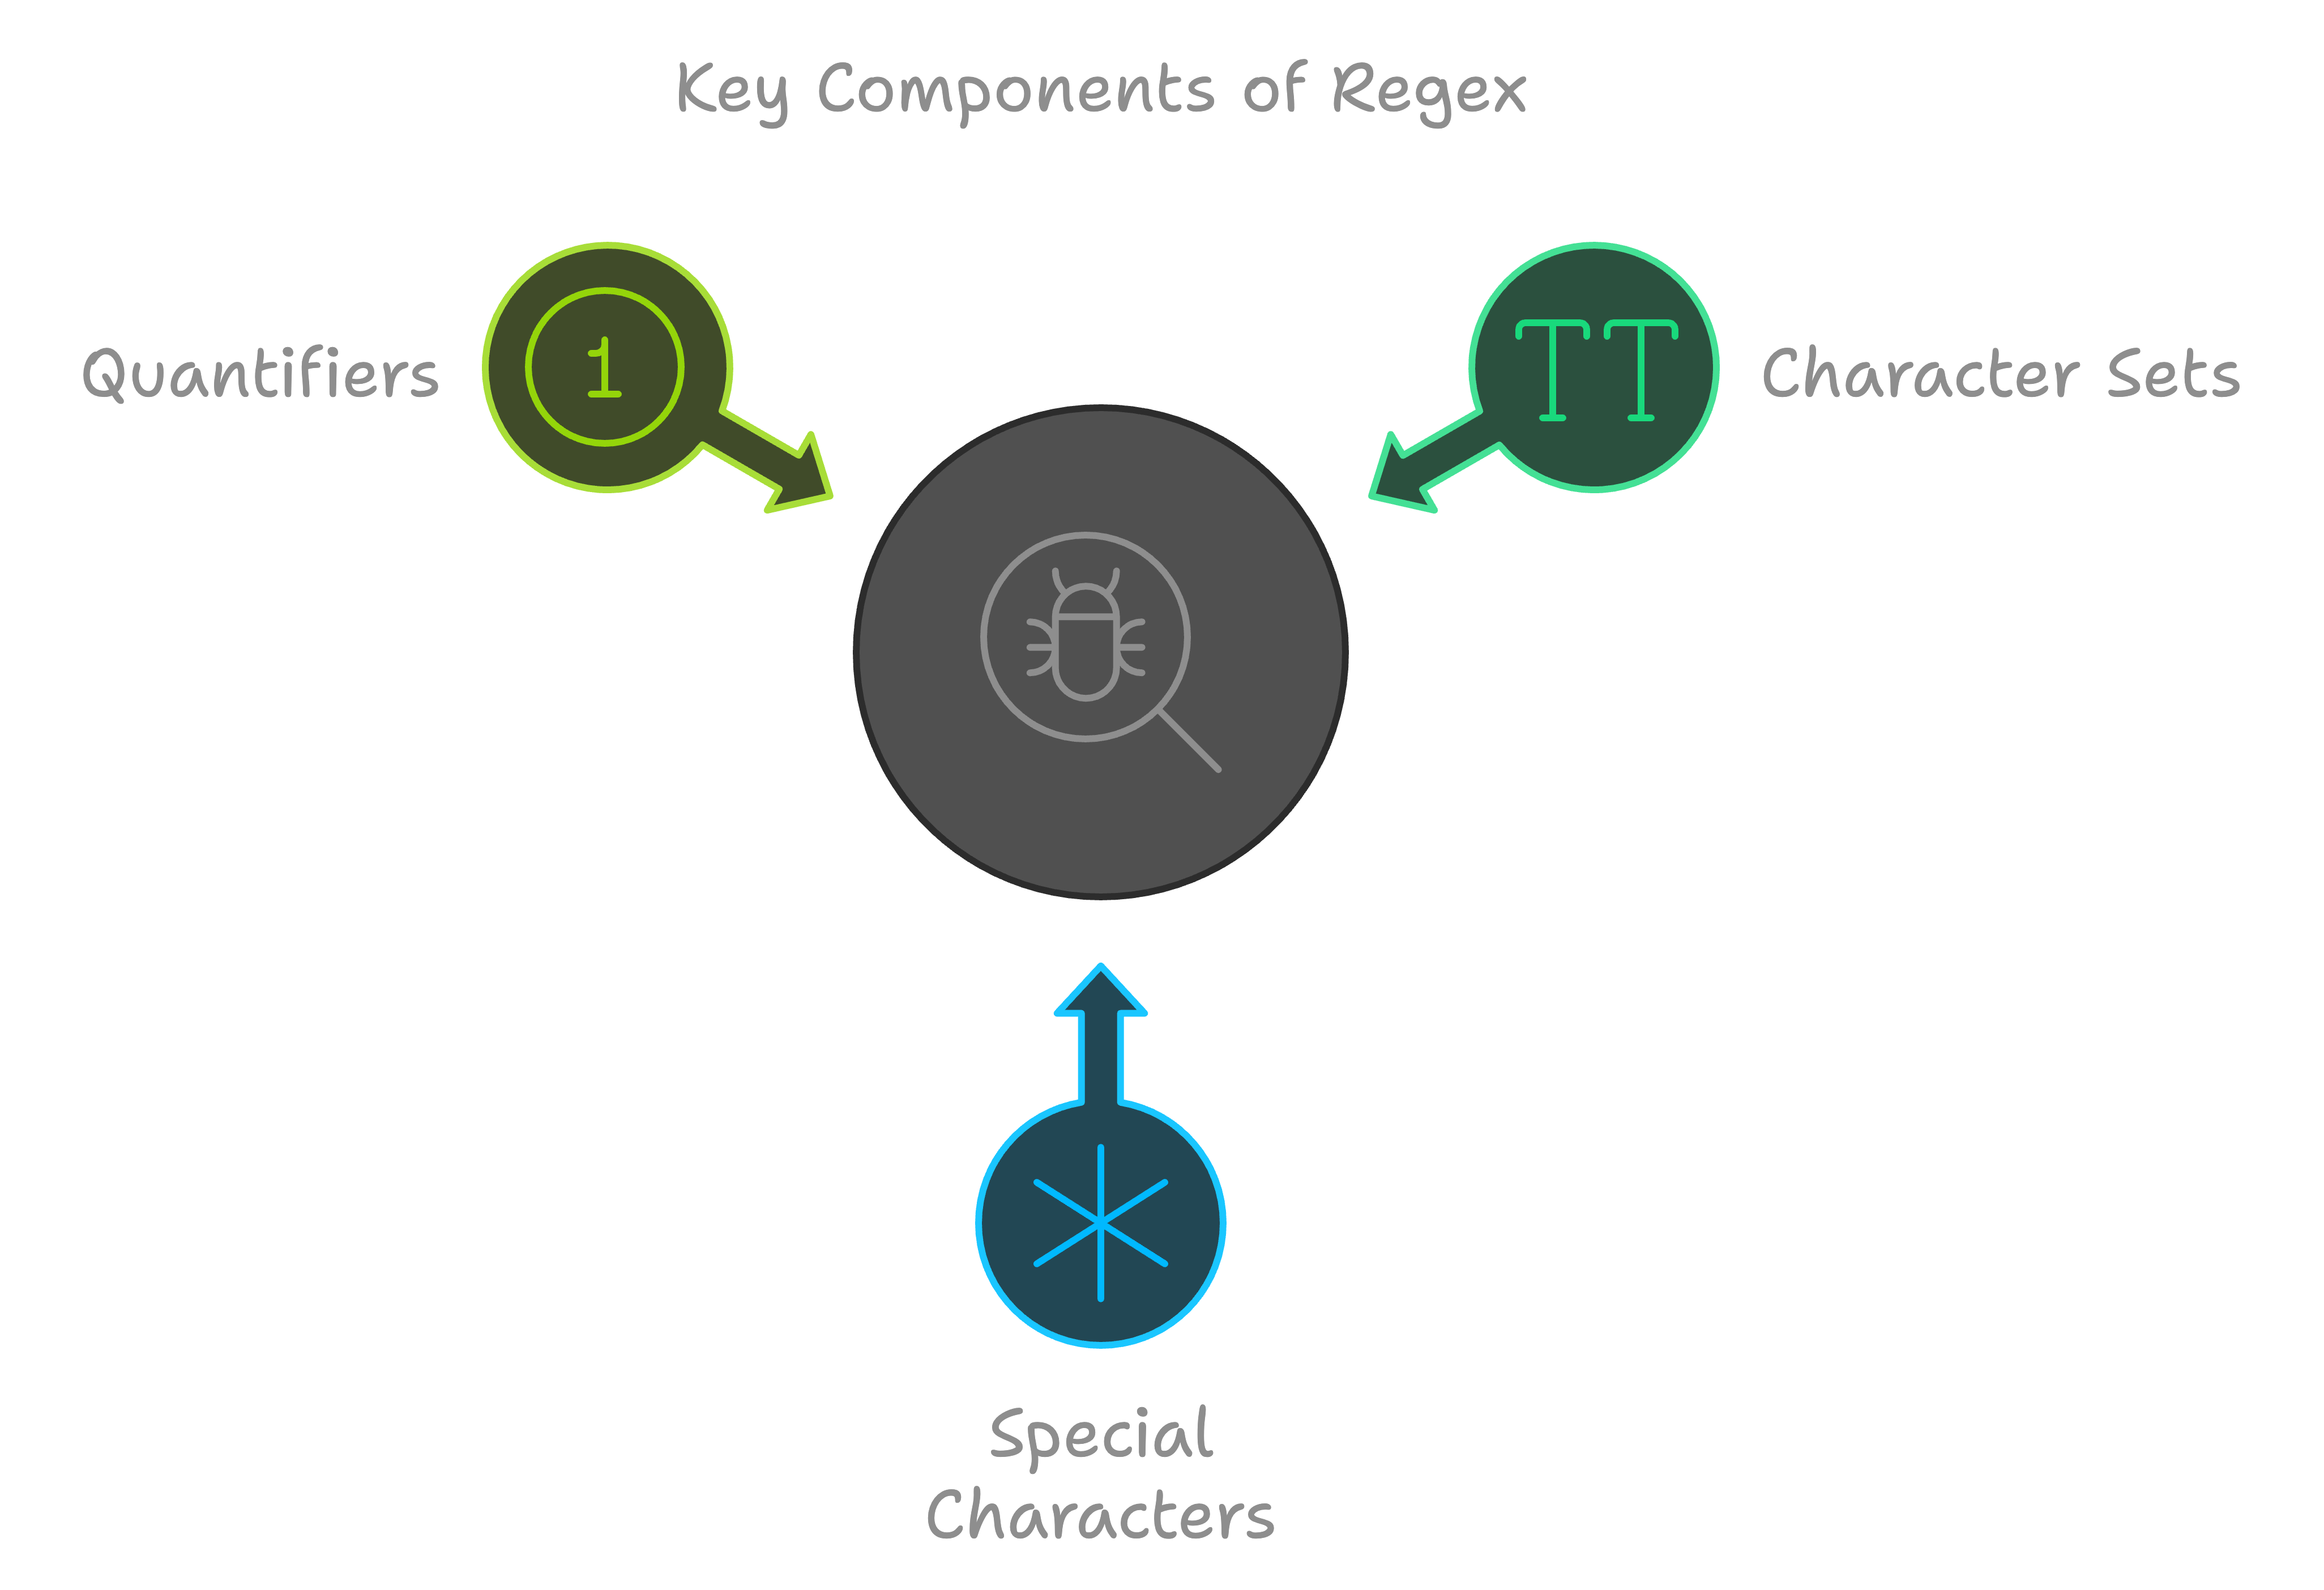

## Remove Punctuation

In [27]:
import string

text = "Hello, World! Welcome to NLP."
cleaned_text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation, although personally I think this is the least intuitive way to do this
print(cleaned_text)


Hello World Welcome to NLP


The str.maketrans() function in Python is used to create a mapping table, which specifies how different characters in a string should be replaced or translated. The function returns a dictionary-like table where each character in the first argument is mapped to the corresponding character in the second argument.

## Tokenization and Stopword Removal

Tokenization is the process of breaking down a text into smaller units called tokens. These tokens can be words, subwords, or sentences, depending on the type of tokenization used. In NLP, tokenization is essential because it allows machines to understand text by turning a long string of characters into individual components that can be processed for tasks like text analysis, machine learning, or translation.

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

text = "AIR's LLM Engineering Course is the best, and I am having a great time today!"
tokens = word_tokenize(text.lower())  # Tokenization and lowercasing
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords

print("Original Text:", text)
print("Filtered tokens:", filtered_tokens)


Original Text: AIR's LLM Engineering Course is the best, and I am having a great time today!
Filtered tokens: ['air', "'s", 'llm', 'engineering', 'course', 'best', ',', 'great', 'time', 'today', '!']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stopword removal is the process of eliminating common words (like "the," "is," "and") from a text. These words, called stopwords, often carry little meaning on their own and can clutter text analysis or model training.

We need stopword removal because stopwords (common words like "the," "is," and "and") don’t provide significant meaning and can clutter text analysis or machine learning models. By removing these words, we can reduce noise, focus on more important features, and make models more efficient. This step helps in improving the performance of NLP tasks, as it simplifies the text and allows algorithms to focus on meaningful patterns or content, reducing dimensionality and computational complexity.


## Lemmatization

Lemmatization is the process of reducing words to their base or root form, called a lemma, while considering the context and meaning of the word. Unlike stemming, which cuts off suffixes, lemmatization returns valid dictionary words (e.g., "running" becomes "run," "better" becomes "good")

In [29]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
tokens = ['running', 'eating', 'meowing', 'better', 'cats']
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

print("Original tokens:", tokens)
print("Lemmatized tokens:", lemmatized_tokens)


Original tokens: ['running', 'eating', 'meowing', 'better', 'cats']
Lemmatized tokens: ['running', 'eating', 'meowing', 'better', 'cat']


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Stemming


Stemming is the process of reducing words to their root form by stripping affixes (e.g., "running" becomes "run"). It’s a fast and straightforward technique but may result in non-standard or incomplete words.

In [30]:
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()


# Sample words
words = ["running", "runner", "ran", "easily", "fairly", "eating", "meowing", "better", "cats"]

# Apply stemming
stemmed_words = [stemmer.stem(word) for word in words]
print("Original tokens:", words)
print("Stemmed tokens:", stemmed_words)


Original tokens: ['running', 'runner', 'ran', 'easily', 'fairly', 'eating', 'meowing', 'better', 'cats']
Stemmed tokens: ['run', 'runner', 'ran', 'easili', 'fairli', 'eat', 'meow', 'better', 'cat']


**Stemming Versus Lemmatization**

Use lemmatization when:
- Accuracy is more important than speed.
- You need valid dictionary words (e.g., "better" → "good").
- You require context-aware transformations (e.g., verb tense, plurals).
- Applications like search engines or chatbots where semantic meaning matters.

Use stemming when:
- Speed is a priority over precision.
- Non-standard word forms are acceptable (e.g., "running" → "run").
- You are performing quick text classification or simple tasks where exact meaning is less critical.

**lemma is an actual language word, whereas stem may not be an actual word**

## Preprocessing with SpaCy

In [31]:
import spacy

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

text = "The quick brown foxes are jumping over the lazy dogs."

# Process the text
doc = nlp(text)

# Tokenization, stop word removal, and lemmatization; personally this is my preferred library
cleaned_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
print("Original text:", text)
print("Cleaned tokens:", cleaned_tokens)


Original text: The quick brown foxes are jumping over the lazy dogs.
Cleaned tokens: ['quick', 'brown', 'fox', 'jump', 'lazy', 'dog']


# Text Vectorization

## Bag of Words Representation

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
documents = ["I love NLP", "NLP is fascinating", "I enjoy learning NLP", "AI is completely amazing", "Hi Carlo"]

# Initialize BoW Vectorizer
vectorizer = CountVectorizer()

# Fit and transform the documents
X = vectorizer.fit_transform(documents)

# Convert to array and display the vocabulary
print(vectorizer.get_feature_names_out())
print(X.toarray())


['ai' 'amazing' 'carlo' 'completely' 'enjoy' 'fascinating' 'hi' 'is'
 'learning' 'love' 'nlp']
[[0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 1 0 1 0 0 1]
 [0 0 0 0 1 0 0 0 1 0 1]
 [1 1 0 1 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0]]


In Bag of Words (BoW), text is represented by a matrix where each row is a document and each column is a unique word from the entire corpus. The matrix contains counts of how often each word appears in a document, ignoring word order or meaning.

## TF-IDF Representation

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
documents = ["I love NLP", "NLP is fascinating", "I enjoy learning NLP", "AI is completely amazing", "Hi Carlo"]

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents
X_tfidf = tfidf_vectorizer.fit_transform(documents)

# Convert to array and display the vocabulary
print(tfidf_vectorizer.get_feature_names_out())
print(X_tfidf.toarray())


['ai' 'amazing' 'carlo' 'completely' 'enjoy' 'fascinating' 'hi' 'is'
 'learning' 'love' 'nlp']
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.83088075 0.55645052]
 [0.         0.         0.         0.         0.         0.69015927
  0.         0.55681615 0.         0.         0.4622077 ]
 [0.         0.         0.         0.         0.63907044 0.
  0.         0.         0.63907044 0.         0.42799292]
 [0.52335825 0.52335825 0.         0.52335825 0.         0.
  0.         0.42224214 0.         0.         0.        ]
 [0.         0.         0.70710678 0.         0.         0.
  0.70710678 0.         0.         0.         0.        ]]


TF-IDF (Term Frequency-Inverse Document Frequency) improves on BoW by weighing terms based on their frequency in a document compared to their rarity in the overall corpus, emphasizing important but uncommon words.

## Word Embeddings with Word2Vec

In [34]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Sample documents
documents = ["I love NLP", "NLP is fascinating", "I enjoy learning NLP", "AI is completely amazing", "Hi Carlo"]


# Sample documents and tokenization
tokenized_docs = [word_tokenize(doc.lower()) for doc in documents]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=1, workers=4)

# Get vector for a word
vector = model.wv['nlp']
print(vector)


[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
 -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
 -1.5080082e-03  2.46979

Word2Vec, a word embedding technique, captures semantic relationships by converting words into continuous vectors, grouping similar words closer in the vector space based on context.

# NLP Text Processing Pipeline with IMDB

In [35]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv("IMDB.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [37]:
# Import necessary libraries

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Remove HTML tags and special characters
def preprocess_text(text):
  text = re.sub('<[^<]+?>', '', text) # Remove HTML tags
  text = re.sub('[^a-zA-Z0-9\s]', '', text) # Remove special characters
  text = text.lower() # Convert to lowercase
  return text

# Apply preprocessing to the 'review' column
df['review'] = df['review'].apply(preprocess_text)

df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


In [38]:
# Tokenization and Stop Word Removal
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
def remove_stopwords_and_tokenize(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

df['review'] = df['review'].apply(remove_stopwords_and_tokenize)
df


,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, theres, family, little, boy, jake,...",negative
4,"[petter, matteis, love, time, money, visually,...",positive
...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...",positive
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[catholic, taught, parochial, elementary, scho...",negative
49998,"[im, going, disagree, previous, comment, side,...",negative


In [39]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

df['review'] = df['review'].apply(lemmatize_tokens)
df


,review,sentiment
0,"[one, reviewer, mentioned, watching, 1, oz, ep...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, there, family, little, boy, jake, ...",negative
4,"[petter, matteis, love, time, money, visually,...",positive
...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...",positive
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[catholic, taught, parochial, elementary, scho...",negative
49998,"[im, going, disagree, previous, comment, side,...",negative


In [40]:
df['review'][0]

['one',
 'reviewer',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'youll',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scene',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focus',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'manyaryans',
 'muslim',
 'gangsta',
 'latino',
 'christian',
 'italian',
 'irish',
 'moreso',
 'scuffle',
 'death',
 'stare',
 'dodgy',
 'dealing',
 'shady',
 'agreement',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'go',
 'show'

In [41]:
from gensim.models import Word2Vec
# Train Word2Vec model using the pre-tokenized words
model = Word2Vec(sentences=df['review'], vector_size=100, window=5, min_count=1, workers=4)


In [42]:
model

In [43]:

# Function to get the average word vector for a review
def get_review_vector(tokenized_review):
    # Only include words that are in the Word2Vec model's vocabulary
    valid_words = [word for word in tokenized_review if word in model.wv.key_to_index]
    if valid_words:  # Check if there are any valid words
        # Calculate the mean of the word vectors
        return np.mean([model.wv[word] for word in valid_words], axis=0)
    else:
        # Return a zero vector if no valid words are found
        return np.zeros(model.vector_size)

# Apply the function to each row in the 'reviews' column
df['review_vector'] = df['review'].apply(lambda x: get_review_vector(x))

In [44]:
df

,review,sentiment,review_vector
0,"[one, reviewer, mentioned, watching, 1, oz, ep...",positive,"[-0.40572515, 0.55639094, -0.07275911, 0.06785..."
1,"[wonderful, little, production, filming, techn...",positive,"[-0.1648761, 0.8040584, -0.41706994, -0.049047..."
2,"[thought, wonderful, way, spend, time, hot, su...",positive,"[-0.10233838, 0.52631086, -0.35728228, 0.12035..."
3,"[basically, there, family, little, boy, jake, ...",negative,"[-0.20199978, 0.5477766, -0.08806613, 0.331690..."
4,"[petter, matteis, love, time, money, visually,...",positive,"[0.00820845, 0.43351611, -0.2159537, 0.0188064..."
...,...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...",positive,"[0.38710272, 0.29556686, -0.34824082, -0.01314..."
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative,"[-0.16544077, 0.33273748, -0.15078072, 0.13584..."
49997,"[catholic, taught, parochial, elementary, scho...",negative,"[-0.28448048, 0.37090722, -0.1010089, 0.061224..."
49998,"[im, going, disagree, previous, comment, side,...",negative,"[-0.1798314, 0.6131392, -0.14561497, 0.0486477..."


In [50]:
# Function to determine if sentiment is positive or negative based on the mean of the vector
def determine_sentiment(vector):
    # If the mean of the vector is positive, classify as positive sentiment
    if np.mean(vector) > 0:
        return 'positive'
    else:
        return 'negative'

# Apply the sentiment determination function to each vector
df['predicted_sentiment'] = df['review_vector'].apply(lambda x: determine_sentiment(x))


In [51]:
df

,review,sentiment,review_vector,predicted_sentiment
0,"[one, reviewer, mentioned, watching, 1, oz, ep...",positive,"[-0.40572515, 0.55639094, -0.07275911, 0.06785...",positive
1,"[wonderful, little, production, filming, techn...",positive,"[-0.1648761, 0.8040584, -0.41706994, -0.049047...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive,"[-0.10233838, 0.52631086, -0.35728228, 0.12035...",positive
3,"[basically, there, family, little, boy, jake, ...",negative,"[-0.20199978, 0.5477766, -0.08806613, 0.331690...",positive
4,"[petter, matteis, love, time, money, visually,...",positive,"[0.00820845, 0.43351611, -0.2159537, 0.0188064...",positive
...,...,...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...",positive,"[0.38710272, 0.29556686, -0.34824082, -0.01314...",positive
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative,"[-0.16544077, 0.33273748, -0.15078072, 0.13584...",positive
49997,"[catholic, taught, parochial, elementary, scho...",negative,"[-0.28448048, 0.37090722, -0.1010089, 0.061224...",positive
49998,"[im, going, disagree, previous, comment, side,...",negative,"[-0.1798314, 0.6131392, -0.14561497, 0.0486477...",positive


In [52]:
df['predicted_sentiment'].value_counts()

,count
predicted_sentiment,
positive,49547
negative,453


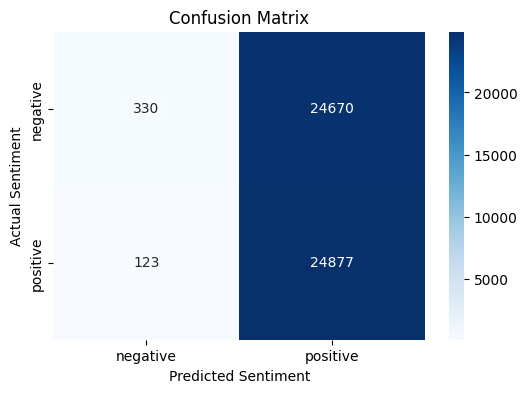

In [54]:
# how can we make the model better? what else would you do?


# Get unique labels from the actual and predicted sentiment columns
unique_labels = list(set(df['sentiment'].unique()) | set(df['predicted_sentiment'].unique()))

# Create confusion matrix using the unique labels
conf_matrix = confusion_matrix(df['sentiment'], df['predicted_sentiment'], labels=unique_labels)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_labels,  # Use dynamic labels
            yticklabels=unique_labels)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix')
plt.show()